In [2]:
import numpy as np 
import pandas as pd 
from time import time 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import warnings 
warnings.filterwarnings('ignore') 
from IPython.display import display # Allows the use of display() for DataFrames 
%matplotlib inline 
data = pd.read_csv('/content/datasets_1846_3197_Social_Network_Ads.csv', na_values=['?',None]) 
display(data.head(n=20)) 
data = data.fillna(method='ffill') 


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [35]:
data['Gender'].fillna(value=data['Gender'].mode()[0], inplace=True)
data['Gender']= data["Gender"].replace("Female", "1")
data['Gender']= data["Gender"].replace("Male", "0")
data['Gender']= data["Gender"].replace("Other", "2")
data['Gender'] = data['Gender'].astype(int)
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       0   19            19000          0
1    15810944       0   35            20000          0
2    15668575       1   26            43000          0
3    15603246       1   27            57000          0
4    15804002       0   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       1   46            41000          1
396  15706071       0   51            23000          1
397  15654296       1   50            20000          1
398  15755018       0   36            33000          0
399  15594041       1   49            36000          1

[400 rows x 5 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.shape

(400, 5)

In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [18]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]



0


,User ID,Gender,Age,EstimatedSalary,Purchased


<function matplotlib.pyplot.show>

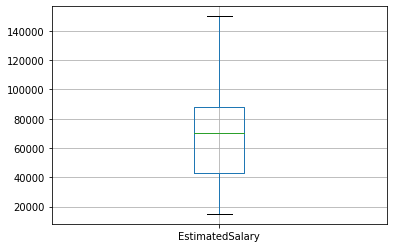

In [7]:
data.boxplot(column=["EstimatedSalary"])
plt.show

<function matplotlib.pyplot.show>

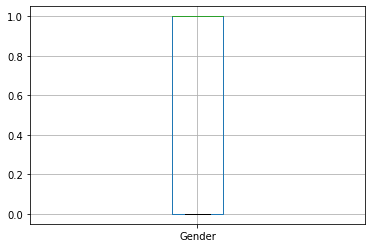

In [38]:
data.boxplot(column=["Gender"])
plt.show

<function matplotlib.pyplot.show>

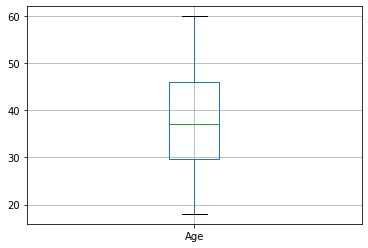

In [39]:
data.boxplot(column=["Age"])
plt.show

<function matplotlib.pyplot.show>

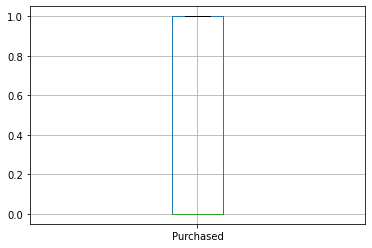

In [40]:
data.boxplot(column=["Purchased"])
plt.show

In [8]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


Text(0.5, 1.0, 'age vs gender')

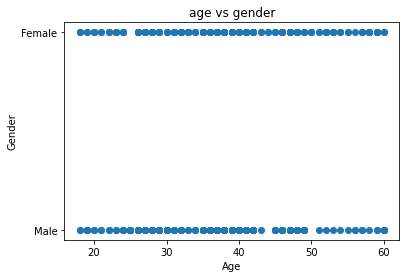

In [46]:
#plotting various combinations of parameter
plt.scatter(data['Age'], data['Gender'])
plt.xlabel('Age', )
plt.ylabel('Gender')
plt.title('age vs gender')

Text(0.5, 1.0, 'age vs Estimated salary')

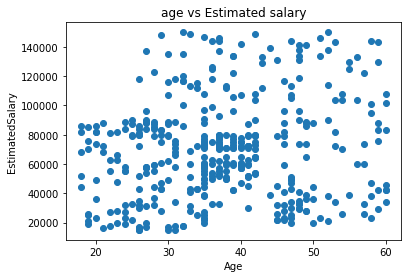

In [49]:
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('age vs Estimated salary')

In [9]:
features = ['Age','EstimatedSalary']
X = data[features]
y = data.iloc[:,4]

In [51]:

#splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [52]:
#standardize the training and test dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
#function to calculate euclidean distance
def euclid_dist(X1,X2):
    dist = np.sum((X1 - X2)**2)
    return np.sqrt(dist)

In [54]:
#function of knn predict

def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

In [55]:
# predicting on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3)
print(y_test)
print(y_hat_test)

305    0
255    1
341    0
56     0
249    1
      ..
232    1
115    0
381    1
145    0
37     0
Name: Purchased, Length: 80, dtype: int64
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]


In [56]:

#calculating accuracy of the model built from scratch
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_hat_test))

Accuracy: 0.925


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


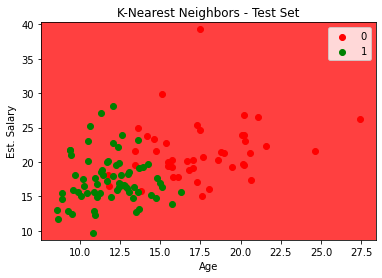

In [63]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,
                              step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
                              step = 0.01))
plt.contourf(X1,X2,classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title("K-Nearest Neighbors - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()